In [7]:
pip install basketball_reference_web_scraper

     |████████████████████████████████| 8.6MB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 153kB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 18.9MB/s eta 0:00:01
     |████████████████████████████████| 512kB 28.4MB/s eta 0:00:01
     |████████████████████████████████| 122kB 23.7MB/s eta 0:00:01
     |████████████████████████████████| 61kB 13.6MB/s eta 0:00:01
  Found existing installation: lxml 4.4.1
    Uninstalling lxml-4.4.1:
      Successfully uninstalled lxml-4.4.1
  Found existing installation: certifi 2019.9.11
    Uninstalling certifi-2019.9.11:
      Successfully uninstalled certifi-2019.9.11
  Found existing installation: idna 2.8
    Uninstalling idna-2.8:
      Successfully uninstalled idna-2.8
  Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Successfully uninstalled pytz-2019.3
  Found existing installation: urllib3 1.24.2
    Uninstalling urllib3-1.24.2:
      Successfully uninstalled urllib3-1.24.2
  Fou

## The goal of this is to identify which nba statistic is the best statistic that identifies the top players in the NBA

In [8]:
# This imports the client
from basketball_reference_web_scraper import client

In [10]:
#This imports the Team enum
from basketball_reference_web_scraper.data import Team

In [2]:
from basketball_reference_web_scraper import client

# Get 2017-2018 advanced season statistics for all players
data = client.players_advanced_season_totals(season_end_year=2018)

# The players_advanced_season_totals method also supports all output behavior previously described


from basketball_reference_web_scraper import client

# Get 2017-2018 season totals for all players
data2 = client.players_season_totals(season_end_year=2018)

# The players_season_totals method also supports all output behavior previously described

In [3]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Turn numpy array into dataframe
nba = pd.DataFrame(data=data, index=None)
nba.head(5)

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,abrinal01,Álex Abrines,[Position.SHOOTING_GUARD],24,Team.OKLAHOMA_CITY_THUNDER,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,acyqu01,Quincy Acy,[Position.POWER_FORWARD],27,Team.BROOKLYN_NETS,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,adamsst01,Steven Adams,[Position.CENTER],24,Team.OKLAHOMA_CITY_THUNDER,76,2487,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,adebaba01,Bam Adebayo,[Position.CENTER],20,Team.MIAMI_HEAT,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],32,Team.ORLANDO_MAGIC,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


In [27]:
#Check the data types
nba.dtypes

slug                              object
name                              object
positions                         object
age                                int64
team                              object
games_played                       int64
minutes_played                     int64
player_efficiency_rating         float64
true_shooting_percentage         float64
three_point_attempt_rate         float64
free_throw_attempt_rate          float64
offensive_rebound_percentage     float64
defensive_rebound_percentage     float64
total_rebound_percentage         float64
assist_percentage                float64
steal_percentage                 float64
block_percentage                 float64
turnover_percentage              float64
usage_percentage                 float64
offensive_win_shares             float64
defensive_win_shares             float64
win_shares                       float64
win_shares_per_48_minutes        float64
offensive_box_plus_minus         float64
defensive_box_pl

In [28]:
#Check num values
nba.isnull().sum()

slug                             0
name                             0
positions                        0
age                              0
team                             0
games_played                     0
minutes_played                   0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_rate          0
offensive_rebound_percentage     0
defensive_rebound_percentage     0
total_rebound_percentage         0
assist_percentage                0
steal_percentage                 0
block_percentage                 0
turnover_percentage              0
usage_percentage                 0
offensive_win_shares             0
defensive_win_shares             0
win_shares                       0
win_shares_per_48_minutes        0
offensive_box_plus_minus         0
defensive_box_plus_minus         0
box_plus_minus                   0
value_over_replacement_player    0
dtype: int64

#### Notice that data is clean!

### Exploratory Analysis

#### Now, I would like to look at some features that interact well with PER statistics. PER has become the most commonly used advanced metric. PER measures a player's per-minute productivity.  

#### PER takes into account accomplishments, such as field goals, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls. Top players can generally be found at the top of the list, so its a nice snapshot of where players stand in relationship to one another.

In [47]:
#Remove players that have not played more than half of the nba games in 2017
nbadata = nba[nba['games_played']>42]
nbadata.head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,abrinal01,Álex Abrines,[Position.SHOOTING_GUARD],24,Team.OKLAHOMA_CITY_THUNDER,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,acyqu01,Quincy Acy,[Position.POWER_FORWARD],27,Team.BROOKLYN_NETS,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,adamsst01,Steven Adams,[Position.CENTER],24,Team.OKLAHOMA_CITY_THUNDER,76,2487,20.6,0.630,0.003,...,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,adebaba01,Bam Adebayo,[Position.CENTER],20,Team.MIAMI_HEAT,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,afflaar01,Arron Afflalo,[Position.SHOOTING_GUARD],32,Team.ORLANDO_MAGIC,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


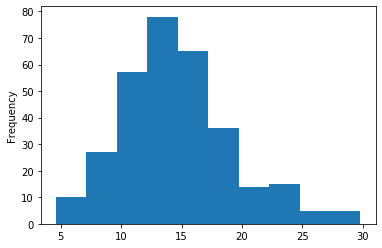

In [48]:
nbadata['player_efficiency_rating'].plot.hist()

In [49]:
from scipy import stats
stats.normaltest(nbadata['player_efficiency_rating'])

NormaltestResult(statistic=23.32911246443724, pvalue=8.593055059089773e-06)

#### It is normally distribution because it is greater than 0.05 p-value. 

### Lets look at how player efficiency rating interacts with the other variables.

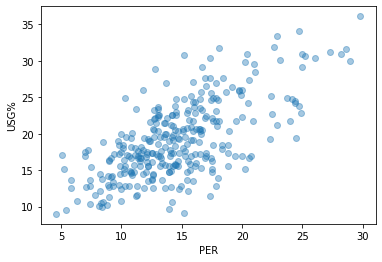

In [50]:
#Interaction with usage rate%
plt.scatter(nbadata['player_efficiency_rating'], nbadata['usage_percentage'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('USG%')
plt.show()

#### This shows a positive correlation between Player Efficiency rating (PER) and Usage Rate % (USG%). Player Efficiency Rating (PER) attempts to boil all the players contribution into one single number. Usage rate is the percentage of team plays that is used by one player while he was on the floor.

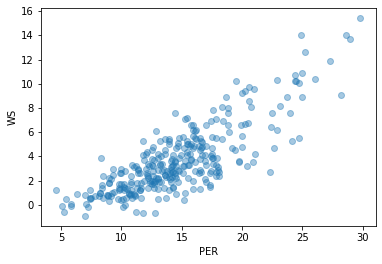

In [51]:
#Interaction with Win Share
plt.scatter(nbadata['player_efficiency_rating'], nbadata['win_shares'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('WS')
plt.show()

#### This shows a slight positive correlation between Player Efficiency rating and Wins Share (WS). Win share is a metric that estimates the number of wins a player produces for his team. 

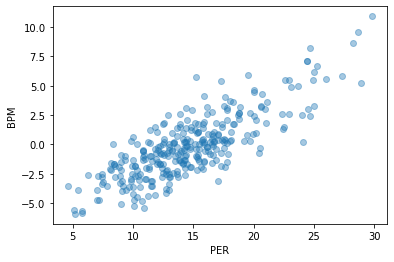

In [52]:
#Interaction with efficiency differential
plt.scatter(nbadata['player_efficiency_rating'], nbadata['box_plus_minus'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('BPM')
plt.show()

#### This shows a slight positive correlation between Player Efficiency rating and box plus minus (BPM). BPM is a metric for evaluating basketball players' quality and contribution to the team. 

In [61]:
# I Selected this variables because they are the most important advanced statistics and commonly used.
nbaset = nbadata[['name', 'positions', 'team', 'player_efficiency_rating', 'usage_percentage', 'win_shares', 'box_plus_minus', 'value_over_replacement_player']]
nbaset.head()

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
0,Álex Abrines,[Position.SHOOTING_GUARD],Team.OKLAHOMA_CITY_THUNDER,9.0,12.7,2.2,-2.2,-0.1
1,Quincy Acy,[Position.POWER_FORWARD],Team.BROOKLYN_NETS,8.2,14.4,1.0,-2.2,-0.1
2,Steven Adams,[Position.CENTER],Team.OKLAHOMA_CITY_THUNDER,20.6,16.7,9.7,3.3,3.3
3,Bam Adebayo,[Position.CENTER],Team.MIAMI_HEAT,15.7,15.9,4.2,0.2,0.8
4,Arron Afflalo,[Position.SHOOTING_GUARD],Team.ORLANDO_MAGIC,5.8,12.5,0.1,-5.8,-0.7


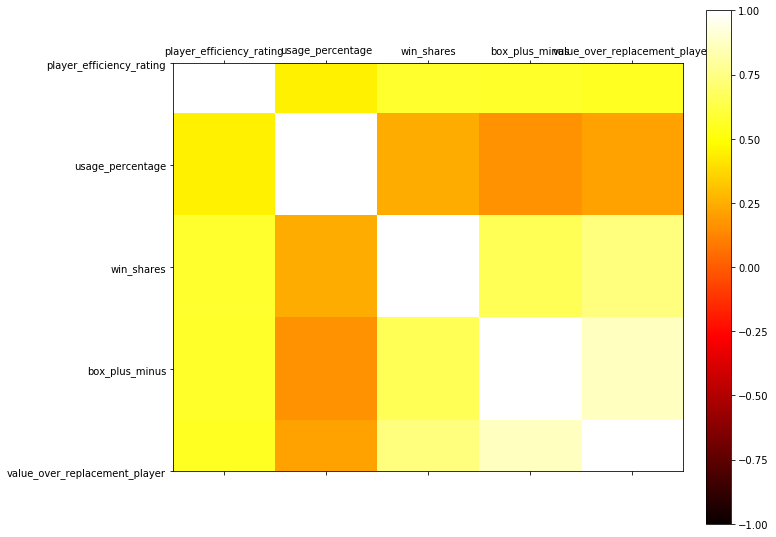

In [62]:
# Obtain figure associated with the plot we want to create
dfCorrelation = nbaset.corr('kendall')
fig = plt.figure()

# Create heatmap subplot  
plot_axes = fig.add_subplot(111) 
heatmap = plot_axes.matshow(dfCorrelation, vmin=-1, vmax=1, cmap='hot')

# Add a colorbar on the right based on the heatmap
fig.colorbar(heatmap, fraction=0.046, pad=0.04)

# Create labels with column names
ticks = np.arange(0, dfCorrelation.columns.size, 1) # create a numpy array from 0 to column size
plot_axes.set_xticks(ticks)
plot_axes.set_yticks(ticks)
plot_axes.set_yticklabels(dfCorrelation.columns.values)
plot_axes.set_xticklabels(dfCorrelation.columns.values)


# Set size
fig.set_size_inches((10,10))

In [63]:
#Sort Values by PER
PER = nbaset.sort_values(by=['player_efficiency_rating'], ascending=False)
PER.head(10)

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
213,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,10.9,8.3
135,Anthony Davis,[Position.POWER_FORWARD],Team.NEW_ORLEANS_PELICANS,28.9,30.0,13.7,5.2,4.9
276,LeBron James,[Position.POWER_FORWARD],Team.CLEVELAND_CAVALIERS,28.6,31.6,14.0,9.6,8.9
133,Stephen Curry,[Position.POINT_GUARD],Team.GOLDEN_STATE_WARRIORS,28.2,31.0,9.1,8.6,4.4
15,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,27.3,31.2,11.9,5.8,5.4
157,Kevin Durant,[Position.SMALL_FORWARD],Team.GOLDEN_STATE_WARRIORS,26.0,30.4,10.4,5.6,4.5
335,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,25.2,30.6,12.6,6.7,5.9
6,LaMarcus Aldridge,[Position.CENTER],Team.SAN_ANTONIO_SPURS,25.0,29.1,10.9,3.3,3.3
266,Kyrie Irving,[Position.POINT_GUARD],Team.BOSTON_CELTICS,25.0,31.0,8.9,6.2,4.0
539,Karl-Anthony Towns,[Position.CENTER],Team.MINNESOTA_TIMBERWOLVES,24.9,22.9,14.0,5.5,5.5


In [64]:
#Sort Values by USG%
USG = nbaset.sort_values(by=['usage_percentage'], ascending=False)
USG.head(10)

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
213,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,10.9,8.3
569,Russell Westbrook,[Position.POINT_GUARD],Team.OKLAHOMA_CITY_THUNDER,24.7,34.1,10.1,8.2,7.5
162,Joel Embiid,[Position.CENTER],Team.PHILADELPHIA_76ERS,22.9,33.4,6.2,2.6,2.2
123,DeMarcus Cousins,[Position.CENTER],Team.NEW_ORLEANS_PELICANS,22.6,31.9,4.7,5.5,3.3
61,Devin Booker,[Position.SHOOTING_GUARD],Team.PHOENIX_SUNS,18.1,31.7,2.4,0.4,1.2
276,LeBron James,[Position.POWER_FORWARD],Team.CLEVELAND_CAVALIERS,28.6,31.6,14.0,9.6,8.9
15,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,27.3,31.2,11.9,5.8,5.4
266,Kyrie Irving,[Position.POINT_GUARD],Team.BOSTON_CELTICS,25.0,31.0,8.9,6.2,4.0
461,Kristaps Porziņģis,[Position.POWER_FORWARD],Team.NEW_YORK_KNICKS,20.4,31.0,3.2,-0.7,0.5
133,Stephen Curry,[Position.POINT_GUARD],Team.GOLDEN_STATE_WARRIORS,28.2,31.0,9.1,8.6,4.4


In [65]:
#Sort Values by WS
WS = nbaset.sort_values(by=['win_shares'], ascending=False)
WS.head(10)

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
213,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,10.9,8.3
276,LeBron James,[Position.POWER_FORWARD],Team.CLEVELAND_CAVALIERS,28.6,31.6,14.0,9.6,8.9
539,Karl-Anthony Towns,[Position.CENTER],Team.MINNESOTA_TIMBERWOLVES,24.9,22.9,14.0,5.5,5.5
135,Anthony Davis,[Position.POWER_FORWARD],Team.NEW_ORLEANS_PELICANS,28.9,30.0,13.7,5.2,4.9
335,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,25.2,30.6,12.6,6.7,5.9
15,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,27.3,31.2,11.9,5.8,5.4
6,LaMarcus Aldridge,[Position.CENTER],Team.SAN_ANTONIO_SPURS,25.0,29.1,10.9,3.3,3.3
294,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,24.2,10.7,7.1,5.6
157,Kevin Durant,[Position.SMALL_FORWARD],Team.GOLDEN_STATE_WARRIORS,26.0,30.4,10.4,5.6,4.5
154,Andre Drummond,[Position.CENTER],Team.DETROIT_PISTONS,22.9,21.2,10.3,5.5,5.0


In [66]:
#Sort Values by BPM
BPM = nbaset.sort_values(by=['box_plus_minus'], ascending=False)
BPM.head(10)

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
213,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,10.9,8.3
276,LeBron James,[Position.POWER_FORWARD],Team.CLEVELAND_CAVALIERS,28.6,31.6,14.0,9.6,8.9
133,Stephen Curry,[Position.POINT_GUARD],Team.GOLDEN_STATE_WARRIORS,28.2,31.0,9.1,8.6,4.4
569,Russell Westbrook,[Position.POINT_GUARD],Team.OKLAHOMA_CITY_THUNDER,24.7,34.1,10.1,8.2,7.5
294,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,24.2,10.7,7.1,5.6
444,Chris Paul,[Position.POINT_GUARD],Team.HOUSTON_ROCKETS,24.4,24.5,10.2,7.1,4.2
335,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,25.2,30.6,12.6,6.7,5.9
266,Kyrie Irving,[Position.POINT_GUARD],Team.BOSTON_CELTICS,25.0,31.0,8.9,6.2,4.0
342,Kyle Lowry,[Position.POINT_GUARD],Team.TORONTO_RAPTORS,19.5,21.7,10.2,5.9,5.0
15,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,27.3,31.2,11.9,5.8,5.4


In [68]:
#Sort Values by VOR
VOR = nbaset.sort_values(by=['value_over_replacement_player'], ascending=False)
VOR.head(10)

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
276,LeBron James,[Position.POWER_FORWARD],Team.CLEVELAND_CAVALIERS,28.6,31.6,14.0,9.6,8.9
213,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.8,36.1,15.4,10.9,8.3
569,Russell Westbrook,[Position.POINT_GUARD],Team.OKLAHOMA_CITY_THUNDER,24.7,34.1,10.1,8.2,7.5
335,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,25.2,30.6,12.6,6.7,5.9
294,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,24.2,10.7,7.1,5.6
539,Karl-Anthony Towns,[Position.CENTER],Team.MINNESOTA_TIMBERWOLVES,24.9,22.9,14.0,5.5,5.5
15,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,27.3,31.2,11.9,5.8,5.4
342,Kyle Lowry,[Position.POINT_GUARD],Team.TORONTO_RAPTORS,19.5,21.7,10.2,5.9,5.0
154,Andre Drummond,[Position.CENTER],Team.DETROIT_PISTONS,22.9,21.2,10.3,5.5,5.0
135,Anthony Davis,[Position.POWER_FORWARD],Team.NEW_ORLEANS_PELICANS,28.9,30.0,13.7,5.2,4.9


### When sorting the values of each column, James Harden is the top player in each 4/5 columns. James Harden was the NBA MVP in 2017-2018 season.